In [222]:
# import required libraries
import requests
from bs4 import BeautifulSoup
import re 
import pandas as pd
import numpy as np

## problem statement

- I want to do analysis on Mobile prices.
- brands, models, Storage, RAM, camera, battery, display, processor, color, prices
- flipkart, amazon, own brand websites

In [223]:
url = "https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=012d8302-5860-4830-a39f-89f4660c5e2a"
page = requests.get(url,headers = headers)
soup=BeautifulSoup(page.text)


p = soup.find_all("div", class_="Nx9bqj _4b5DiR")
prices = []
for i in p:
    prices.append(i.text)

data = soup.find_all("div",class_="KzDlHZ")
brands = []
for i in data:
    brands.append(i.text.split()[0])

models = []
for i in data:
    models.append(i.text.split("(")[0])

colors = []
for i in data:
    colors.append(i.text.split("(")[1].split(",")[0])

features = soup.find_all("li",class_="J+igdf")

RAM = []
for i in features:
    a = i.text
    b = re.findall(r"(\d+)\s\w+\sRAM",a)
    if len(b)>0:
        RAM.append(b[0])

ROM = []
for i in features:
    a = i.text
    b = re.findall(r"(\d+)\s\w+\sROM",a)
    if len(b)>0:
        ROM.append(b[0])

ss = []
for i in features:
    a = i.text
    b = re.findall(r"(\d+\.\d+)\sinch",a)
    if len(b)>0:
        ss.append(b[0])

battery = []
for i in features:
    a = i.text
    b = re.findall(r"(\d+)\smAh",a)
    if len(b)>0:
        battery.append(b[0])

# creating DataFrame of 1st page

In [224]:
d = {"Brand":brands,
"Models":models,
"RAM":RAM,
"Color":colors,
"ROM":ROM,
"Display":ss,
"Battery":battery,
"Price":prices}

In [225]:
pd.DataFrame(d)

ValueError: All arrays must be of the same length

In [226]:
len(RAM)

20

In [227]:
for i in range(len(brands)):
    if brands[i]=='Apple':
        RAM.insert(i,np.nan)
        battery.insert(i,np.nan)

In [228]:
df=pd.DataFrame(d)

In [229]:
df

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
0,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,4,Midnight Violet,128,6.67,6000,"₹11,999"
1,Apple,Apple iPhone 16,NaN,Black,256,6.1,NaN,"₹79,999"
2,Apple,Apple iPhone 16,NaN,White,256,6.1,NaN,"₹79,999"
3,vivo,vivo T4 Lite 5G Charger in the Box,8,Prism Blue,256,6.74,6000,"₹12,999"
4,vivo,vivo T4 Lite 5G Charger in the Box,6,Titanium Gold,128,6.74,6000,"₹10,999"
5,vivo,vivo T4x 5G,8,Pronto Purple,128,6.72,6500,"₹14,499"
6,Apple,Apple iPhone 16,NaN,Teal,256,6.1,NaN,"₹79,999"
7,vivo,vivo T4x 5G,8,Marine Blue,128,6.72,6500,"₹14,499"
8,vivo,vivo T4 Lite 5G Charger in the Box,6,Prism Blue,128,6.74,6000,"₹10,999"
9,MOTOROLA,MOTOROLA g35 5G,4,Midnight Black,128,6.72,5000,"₹8,999"


# 2nd page

In [230]:
url2 = "https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=012d8302-5860-4830-a39f-89f4660c5e2a&page=2"
page = requests.get(url2,headers=headers)
page

<Response [200]>

In [231]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,/;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
}

In [232]:
#url = "https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=012d8302-5860-4830-a39f-89f4660c5e2a"
page = requests.get(url2,headers=headers)
soup=BeautifulSoup(page.text)


p = soup.find_all("div", class_="Nx9bqj _4b5DiR")
prices = []
for i in p:
    prices.append(i.text)

data = soup.find_all("div",class_="KzDlHZ")
brands = []
for i in data:
    brands.append(i.text.split()[0])

models = []
for i in data:
    models.append(i.text.split("(")[0])

colors = []
for i in data:
    colors.append(i.text.split("(")[1].split(",")[0])

features = soup.find_all("li",class_="J+igdf")

RAM = []
for i in features:
    a = i.text
    b = re.findall(r"(\d+)\s\w+\sRAM",a)
    if len(b)>0:
        RAM.append(b[0])

ROM = []
for i in features:
    a = i.text
    b = re.findall(r"(\d+)\s\w+\sROM",a)
    if len(b)>0:
        ROM.append(b[0])

ss = []
for i in features:
    a = i.text
    b = re.findall(r"(\d+\.\d+)\sinch",a)
    if len(b)>0:
        ss.append(b[0])

battery = []
for i in features:
    a = i.text
    b = re.findall(r"(\d+)\smAh",a)
    if len(b)>0:
        battery.append(b[0])

### creating DataFrame of 2nd page

In [233]:
d2 = {"Brand":brands,
"Models":models,
"RAM":RAM,
"Color":colors,
"ROM":ROM,
"Display":ss,
"Battery":battery,
"Price":prices}

In [234]:
df2 = pd.DataFrame(d2)

ValueError: All arrays must be of the same length

In [235]:
for i in range(len(brands)):
    if brands[i]=='Apple':
        RAM.insert(i,np.nan)
        battery.insert(i,np.nan)

In [236]:
df2 = pd.DataFrame(d2)

In [237]:
df2

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
0,Samsung,Samsung Galaxy S24 FE 5G,8,Graphite,256,6.7,4700,"₹33,999"
1,vivo,vivo T4x 5G,6,Pronto Purple,128,6.72,6500,"₹13,499"
2,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,4,Midnight Violet,128,6.67,6000,"₹11,999"
3,realme,realme P4 5G,6,Steel Grey,128,6.77,7000,"₹16,999"
4,Samsung,Samsung Galaxy S24 FE 5G,8,Graphite,128,6.7,4700,"₹29,999"
5,Samsung,Samsung Galaxy S24 FE 5G,8,Mint,128,6.7,4700,"₹29,999"
6,realme,realme P4 Pro 5G,8,Birch Wood,128,6.8,7000,"₹22,999"
7,Apple,Apple iPhone 16 Pro,NaN,Desert Titanium,256,6.3,NaN,"₹1,19,999"
8,MOTOROLA,MOTOROLA Edge 60 Pro,8,Pantone Walnut,256,6.7,6000,"₹26,999"
9,vivo,vivo T4R 5G,8,Arctic White,256,6.77,5700,"₹21,499"


## All Pages 

In [238]:
prices = []
brands = []
models = []
colors = []
RAM = []
ROM = []
ss = []
battery = []
for i in range(3,8):
     print("https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=012d8302-5860-4830-a39f-89f4660c5e2a&page="+str(i))
     urls = "https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=012d8302-5860-4830-a39f-89f4660c5e2a&page="+str(i)
     page = requests.get(urls,headers=headers)
     soup=BeautifulSoup(page.text)


     p = soup.find_all("div", class_="Nx9bqj _4b5DiR")
     for i in p:
         prices.append(i.text)

     data = soup.find_all("div",class_="KzDlHZ")
     for i in data:
         brands.append(i.text.split()[0])
    
     for i in data:
         models.append(i.text.split("(")[0])
    
     for i in data:
          colors.append(i.text.split("(")[1].split(",")[0])
    
     features = soup.find_all("li",class_="J+igdf")
    
     for i in features:
         a = i.text
         b = re.findall(r"(\d+)\s\w+\sRAM",a)
         if len(b)>0:
             RAM.append(b[0])

     for i in features:
         a = i.text
         b = re.findall(r"(\d+)\s\w+\sROM",a)
         if len(b)>0:
              ROM.append(b[0])
    
     for i in features:
         a = i.text
         b = re.findall(r"(\d+\.\d+)\scm",a)
         if len(b)>0:
             ss.append(b[0])
    
     for i in features:
            a = i.text
            b = re.findall(r"(\d+)\smAh",a)
            if len(b)>0:
                battery.append(b[0])
     print(len(ss))

https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=012d8302-5860-4830-a39f-89f4660c5e2a&page=3
24
https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=012d8302-5860-4830-a39f-89f4660c5e2a&page=4
48
https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=012d8302-5860-4830-a39f-89f4660c5e2a&page=5
72
https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobil

In [21]:
5*24

120

In [119]:
len(brands)

120

In [120]:
len(RAM)

112

In [239]:
for i in range(len(brands)):
    if brands[i]=='Apple':
        RAM.insert(i,np.nan)
        battery.insert(i,np.nan)

## creating DataFrame of 3-10 Pages

In [240]:
d3 =  {"Brand":brands,
"Models":models,
"RAM":RAM,
"Color":colors,
"ROM":ROM,
"Display":ss,
"Battery":battery,
"Price":prices}

In [241]:
df3 = pd.DataFrame(d3)

In [242]:
len(ss)

120

In [271]:
df3

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
0,Apple,Apple iPhone 16 Pro,NaN,Desert Titanium,128,16.0,NaN,"₹1,07,999"
1,vivo,vivo T4R 5G,8,Twilight Blue,128,17.2,5700,"₹19,499"
2,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,4,Midnight Violet,128,16.94,6000,"₹11,999"
3,Samsung,Samsung Galaxy A35 5G,8,Awesome Lilac,128,16.76,5000,"₹17,999"
4,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,8,Midnight Violet,128,16.94,6000,"₹14,999"
...,...,...,...,...,...,...,...,...
115,MOTOROLA,MOTOROLA Razr 60,8,PANTONE Gibraltar Sea,256,17.53,4500,"₹39,999"
116,Samsung,Samsung Galaxy S25 Ultra 5G,12,Titanium Silverblue,256,17.53,5000,"₹1,23,499"
117,realme,realme P4 Pro 5G,8,Midnight Ivy,128,17.27,7000,"₹22,999"
118,POCO,POCO X7 5G,8,Yellow,128,16.94,5500,"₹15,999"


In [272]:
df

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
0,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,4,Midnight Violet,128,6.67,6000,"₹11,999"
1,Apple,Apple iPhone 16,NaN,Black,256,6.1,NaN,"₹79,999"
2,Apple,Apple iPhone 16,NaN,White,256,6.1,NaN,"₹79,999"
3,vivo,vivo T4 Lite 5G Charger in the Box,8,Prism Blue,256,6.74,6000,"₹12,999"
4,vivo,vivo T4 Lite 5G Charger in the Box,6,Titanium Gold,128,6.74,6000,"₹10,999"
5,vivo,vivo T4x 5G,8,Pronto Purple,128,6.72,6500,"₹14,499"
6,Apple,Apple iPhone 16,NaN,Teal,256,6.1,NaN,"₹79,999"
7,vivo,vivo T4x 5G,8,Marine Blue,128,6.72,6500,"₹14,499"
8,vivo,vivo T4 Lite 5G Charger in the Box,6,Prism Blue,128,6.74,6000,"₹10,999"
9,MOTOROLA,MOTOROLA g35 5G,4,Midnight Black,128,6.72,5000,"₹8,999"


In [31]:
df = df.drop("Unnamed: 0",axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [244]:
df

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
0,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,4,Midnight Violet,128,6.67,6000,"₹11,999"
1,Apple,Apple iPhone 16,NaN,Black,256,6.1,NaN,"₹79,999"
2,Apple,Apple iPhone 16,NaN,White,256,6.1,NaN,"₹79,999"
3,vivo,vivo T4 Lite 5G Charger in the Box,8,Prism Blue,256,6.74,6000,"₹12,999"
4,vivo,vivo T4 Lite 5G Charger in the Box,6,Titanium Gold,128,6.74,6000,"₹10,999"
5,vivo,vivo T4x 5G,8,Pronto Purple,128,6.72,6500,"₹14,499"
6,Apple,Apple iPhone 16,NaN,Teal,256,6.1,NaN,"₹79,999"
7,vivo,vivo T4x 5G,8,Marine Blue,128,6.72,6500,"₹14,499"
8,vivo,vivo T4 Lite 5G Charger in the Box,6,Prism Blue,128,6.74,6000,"₹10,999"
9,MOTOROLA,MOTOROLA g35 5G,4,Midnight Black,128,6.72,5000,"₹8,999"


## Joining multiple DataFrames

In [273]:
pd.concat([df,df2,df3])

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
0,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,4,Midnight Violet,128,6.67,6000,"₹11,999"
1,Apple,Apple iPhone 16,NaN,Black,256,6.1,NaN,"₹79,999"
2,Apple,Apple iPhone 16,NaN,White,256,6.1,NaN,"₹79,999"
3,vivo,vivo T4 Lite 5G Charger in the Box,8,Prism Blue,256,6.74,6000,"₹12,999"
4,vivo,vivo T4 Lite 5G Charger in the Box,6,Titanium Gold,128,6.74,6000,"₹10,999"
...,...,...,...,...,...,...,...,...
115,MOTOROLA,MOTOROLA Razr 60,8,PANTONE Gibraltar Sea,256,17.53,4500,"₹39,999"
116,Samsung,Samsung Galaxy S25 Ultra 5G,12,Titanium Silverblue,256,17.53,5000,"₹1,23,499"
117,realme,realme P4 Pro 5G,8,Midnight Ivy,128,17.27,7000,"₹22,999"
118,POCO,POCO X7 5G,8,Yellow,128,16.94,5500,"₹15,999"


In [286]:
final_df=pd.concat([df,df2,df3]).reset_index(drop="index")

In [287]:
final_df

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
0,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,4,Midnight Violet,128,6.67,6000,"₹11,999"
1,Apple,Apple iPhone 16,NaN,Black,256,6.1,NaN,"₹79,999"
2,Apple,Apple iPhone 16,NaN,White,256,6.1,NaN,"₹79,999"
3,vivo,vivo T4 Lite 5G Charger in the Box,8,Prism Blue,256,6.74,6000,"₹12,999"
4,vivo,vivo T4 Lite 5G Charger in the Box,6,Titanium Gold,128,6.74,6000,"₹10,999"
...,...,...,...,...,...,...,...,...
163,MOTOROLA,MOTOROLA Razr 60,8,PANTONE Gibraltar Sea,256,17.53,4500,"₹39,999"
164,Samsung,Samsung Galaxy S25 Ultra 5G,12,Titanium Silverblue,256,17.53,5000,"₹1,23,499"
165,realme,realme P4 Pro 5G,8,Midnight Ivy,128,17.27,7000,"₹22,999"
166,POCO,POCO X7 5G,8,Yellow,128,16.94,5500,"₹15,999"


## Data Cleaning

In [288]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Brand    168 non-null    object
 1   Models   168 non-null    object
 2   RAM      155 non-null    object
 3   Color    168 non-null    object
 4   ROM      168 non-null    object
 5   Display  168 non-null    object
 6   Battery  155 non-null    object
 7   Price    168 non-null    object
dtypes: object(8)
memory usage: 10.6+ KB


## Type conversion

In [289]:
final_df["RAM"].astype("int")

ValueError: cannot convert float NaN to integer

In [290]:
final_df["RAM"].fillna(0,inplace=True)
final_df["Battery"].fillna(0,inplace=True)

C:\Users\Suddala Vaishnavi\AppData\Local\Temp\ipykernel_22240\3135213833.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["Battery"].fillna(0,inplace=True)


In [292]:
final_df["RAM"]=final_df["RAM"].astype("int")
final_df["RAM"]

0       4
1       0
2       0
3       8
4       6
       ..
163     8
164    12
165     8
166     8
167    12
Name: RAM, Length: 168, dtype: int32

In [293]:

final_df["ROM"]=final_df["Battery"].astype("int")
final_df["Battery"]=final_df["Battery"].astype("int")
final_df["Display"]=final_df["Battery"].astype("float")

In [294]:
final_df["Price"]=final_df["Prices"].astype("int")


KeyError: 'Prices'

In [295]:
final_df["Price"]=final_df["Price"].str.replace("₹","").str.replace(",","")

In [296]:
final_df["Price"]=final_df["Price"].astype("int")


In [297]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    168 non-null    object 
 1   Models   168 non-null    object 
 2   RAM      168 non-null    int32  
 3   Color    168 non-null    object 
 4   ROM      168 non-null    int32  
 5   Display  168 non-null    float64
 6   Battery  168 non-null    int32  
 7   Price    168 non-null    int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 8.0+ KB


## Data Analysis

In [298]:
final_df["RAM"].unique()

array([ 4,  0,  8,  6, 12, 16])

In [299]:
final_df["Brand"].unique()

array(['OPPO', 'Apple', 'vivo', 'MOTOROLA', 'Samsung', 'Google',
       'Motorola', 'realme', 'POCO', 'CMF', 'Nothing', 'Ai+', 'IQOO',
       'OnePlus', 'Infinix'], dtype=object)

In [300]:
final_df["Brand"].nunique()

15

In [301]:
final_df["Brand"].value_counts()

Brand
Samsung     40
vivo        24
realme      22
MOTOROLA    21
OPPO        14
Apple       13
Nothing      8
Google       6
CMF          5
Motorola     4
POCO         3
OnePlus      3
Ai+          2
IQOO         2
Infinix      1
Name: count, dtype: int64

In [302]:
final_df["Price"].describe()

count       168.000000
mean      27129.565476
std       23967.268695
min        4999.000000
25%       14499.000000
50%       19480.500000
75%       26999.000000
max      123499.000000
Name: Price, dtype: float64

In [303]:
final_df.groupby("Brand")["Price"].mean()

Brand
Ai+          4999.000000
Apple       87460.538462
CMF         17199.000000
Google      63332.333333
IQOO        14744.500000
Infinix     12999.000000
MOTOROLA    20475.190476
Motorola    12999.000000
Nothing     25999.000000
OPPO        13356.142857
OnePlus     17884.666667
POCO        18832.333333
Samsung     27801.175000
realme      17985.363636
vivo        16978.166667
Name: Price, dtype: float64

In [304]:
final_df.groupby("Brand")["Price"].agg(["mean","min","max"])

,mean,min,max
Brand,,,
Ai+,4999.000000,4999,4999
Apple,87460.538462,54999,119999
CMF,17199.000000,15999,17999
Google,63332.333333,29999,89999
IQOO,14744.500000,14699,14790
Infinix,12999.000000,12999,12999
MOTOROLA,20475.190476,6999,39999
Motorola,12999.000000,11999,15999
Nothing,25999.000000,21999,29999


### mobiles under 20000

In [305]:
final_df[final_df["Price"]<=20000]

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
0,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,4,Midnight Violet,6000,6000.0,6000,11999
3,vivo,vivo T4 Lite 5G Charger in the Box,8,Prism Blue,6000,6000.0,6000,12999
4,vivo,vivo T4 Lite 5G Charger in the Box,6,Titanium Gold,6000,6000.0,6000,10999
5,vivo,vivo T4x 5G,8,Pronto Purple,6500,6500.0,6500,14499
7,vivo,vivo T4x 5G,8,Marine Blue,6500,6500.0,6500,14499
...,...,...,...,...,...,...,...,...
153,MOTOROLA,MOTOROLA G96 5G,8,Pantone Cattleya Orchid,5500,5500.0,5500,17999
157,OnePlus,OnePlus Nord CE4 lite 5G,8,MEGA BLUE,5500,5500.0,5500,16597
158,Infinix,Infinix Note 50x 5G+ 45W Charger In the Box & AI,8,Sea Breeze Green,5500,5500.0,5500,12999
162,Ai+,Ai+ Pulse,4,Green,5000,5000.0,5000,4999


In [306]:
final_df[(final_df["Price"]<=15000) & (final_df["Price"]>=13000)]

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
5,vivo,vivo T4x 5G,8,Pronto Purple,6500,6500.0,6500,14499
7,vivo,vivo T4x 5G,8,Marine Blue,6500,6500.0,6500,14499
11,vivo,vivo T4x 5G,6,Marine Blue,6500,6500.0,6500,13499
23,vivo,vivo T4x 5G,6,Pronto Purple,6500,6500.0,6500,13499
25,vivo,vivo T4x 5G,6,Pronto Purple,6500,6500.0,6500,13499
52,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,8,Midnight Violet,6000,6000.0,6000,14999
88,vivo,vivo T4x 5G,8,Glacial Teal,6500,6500.0,6500,14499
129,Samsung,Samsung Galaxy F36 5G,6,Red,5000,5000.0,5000,13999
132,IQOO,IQOO Z10X 5G,8,Ultramarine,6500,6500.0,6500,14699
133,IQOO,IQOO Z10X 5G,8,Titanium,6500,6500.0,6500,14790


In [307]:
final_df[(final_df["Price"]<=15000) & (final_df["Price"]>=13000)&(final_df["Brand"]=="Samsung")]

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
129,Samsung,Samsung Galaxy F36 5G,6,Red,5000,5000.0,5000,13999


In [308]:
final_df

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
0,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,4,Midnight Violet,6000,6000.0,6000,11999
1,Apple,Apple iPhone 16,0,Black,0,0.0,0,79999
2,Apple,Apple iPhone 16,0,White,0,0.0,0,79999
3,vivo,vivo T4 Lite 5G Charger in the Box,8,Prism Blue,6000,6000.0,6000,12999
4,vivo,vivo T4 Lite 5G Charger in the Box,6,Titanium Gold,6000,6000.0,6000,10999
...,...,...,...,...,...,...,...,...
163,MOTOROLA,MOTOROLA Razr 60,8,PANTONE Gibraltar Sea,4500,4500.0,4500,39999
164,Samsung,Samsung Galaxy S25 Ultra 5G,12,Titanium Silverblue,5000,5000.0,5000,123499
165,realme,realme P4 Pro 5G,8,Midnight Ivy,7000,7000.0,7000,22999
166,POCO,POCO X7 5G,8,Yellow,5500,5500.0,5500,15999


In [310]:
final_df.to_csv("batch_410_projects.csv")

In [311]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    168 non-null    object 
 1   Models   168 non-null    object 
 2   RAM      168 non-null    int32  
 3   Color    168 non-null    object 
 4   ROM      168 non-null    int32  
 5   Display  168 non-null    float64
 6   Battery  168 non-null    int32  
 7   Price    168 non-null    int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 8.0+ KB


In [312]:
final_df.isnull().sum()

Brand      0
Models     0
RAM        0
Color      0
ROM        0
Display    0
Battery    0
Price      0
dtype: int64

## Removing Outliers

In [313]:
num_cols = final_df.select_dtypes(include=['float64', 'int64']).columns
outliers = {}
outliers = {}
for col in num_cols:
    if df[col].isnull().all():
        continue  # Skip the columns with all missing values
    Q1 = final_df[col].quantile(0.25)
    Q3 = final_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_values = final_df[(final_df[col] < lower) | (final_df[col] > upper)][col]
    if not outlier_values.empty:
        outliers[col] = outlier_values.tolist()

In [314]:
if outliers:
    for col, vals in outliers.items():
        print(f"\nOutliers in column '{col}':\n{vals}")
else:
      print("No outliers found in the numerical columns.")


Outliers in column 'Display':
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7550.0]


In [315]:
Q1 = final_df["Display"].quantile(0.25)

In [316]:
Q1

5000.0

In [317]:
Q2 = final_df["Display"].quantile(0.50)
Q2

5100.0

In [318]:
Q3 = final_df["Display"].quantile(0.75)
Q3

6000.0

In [319]:
IQR = Q3-Q1
IQR

1000.0

In [320]:
lower_boundary = Q1-(1.5*IQR)
lower_boundary

3500.0

In [321]:
upper_boundary = Q3+(1.5*IQR)
upper_boundary

7500.0

In [322]:
final_df = final_df[(final_df["Display"] >= lower_boundary)&(final_df["Display"] <= upper_boundary)]

In [323]:
final_df

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
0,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,4,Midnight Violet,6000,6000.0,6000,11999
3,vivo,vivo T4 Lite 5G Charger in the Box,8,Prism Blue,6000,6000.0,6000,12999
4,vivo,vivo T4 Lite 5G Charger in the Box,6,Titanium Gold,6000,6000.0,6000,10999
5,vivo,vivo T4x 5G,8,Pronto Purple,6500,6500.0,6500,14499
7,vivo,vivo T4x 5G,8,Marine Blue,6500,6500.0,6500,14499
...,...,...,...,...,...,...,...,...
163,MOTOROLA,MOTOROLA Razr 60,8,PANTONE Gibraltar Sea,4500,4500.0,4500,39999
164,Samsung,Samsung Galaxy S25 Ultra 5G,12,Titanium Silverblue,5000,5000.0,5000,123499
165,realme,realme P4 Pro 5G,8,Midnight Ivy,7000,7000.0,7000,22999
166,POCO,POCO X7 5G,8,Yellow,5500,5500.0,5500,15999


In [324]:
final_df.head(20)

,Brand,Models,RAM,Color,ROM,Display,Battery,Price
0,OPPO,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,4,Midnight Violet,6000,6000.0,6000,11999
3,vivo,vivo T4 Lite 5G Charger in the Box,8,Prism Blue,6000,6000.0,6000,12999
4,vivo,vivo T4 Lite 5G Charger in the Box,6,Titanium Gold,6000,6000.0,6000,10999
5,vivo,vivo T4x 5G,8,Pronto Purple,6500,6500.0,6500,14499
7,vivo,vivo T4x 5G,8,Marine Blue,6500,6500.0,6500,14499
8,vivo,vivo T4 Lite 5G Charger in the Box,6,Prism Blue,6000,6000.0,6000,10999
9,MOTOROLA,MOTOROLA g35 5G,4,Midnight Black,5000,5000.0,5000,8999
10,vivo,vivo T4 Lite 5G Charger in the Box,4,Prism Blue,6000,6000.0,6000,9999
11,vivo,vivo T4x 5G,6,Marine Blue,6500,6500.0,6500,13499
12,vivo,vivo T4 Lite 5G Charger in the Box,4,Titanium Gold,6000,6000.0,6000,9999


In [325]:
num_cols = final_df.select_dtypes(include=['float64', 'int64']).columns
outliers = {}
outliers = {}
for col in num_cols:
    if df[col].isnull().all():
        continue  # Skip the columns with all missing values
    Q1 = final_df[col].quantile(0.25)
    Q3 = final_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_values = final_df[(final_df[col] < lower) | (final_df[col] > upper)][col]
    if not outlier_values.empty:
        outliers[col] = outlier_values.tolist()

In [326]:
if outliers:
    for col, vals in outliers.items():
        print(f"\nOutliers in column '{col}':\n{vals}")
else:
      print("No outliers found in the numerical columns.")

No outliers found in the numerical columns.


In [327]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 167
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    154 non-null    object 
 1   Models   154 non-null    object 
 2   RAM      154 non-null    int32  
 3   Color    154 non-null    object 
 4   ROM      154 non-null    int32  
 5   Display  154 non-null    float64
 6   Battery  154 non-null    int32  
 7   Price    154 non-null    int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 8.4+ KB


In [328]:
final_df["Brand"].unique()

array(['OPPO', 'vivo', 'MOTOROLA', 'Samsung', 'Google', 'Motorola',
       'realme', 'POCO', 'CMF', 'Nothing', 'Ai+', 'IQOO', 'OnePlus',
       'Infinix'], dtype=object)

In [329]:
final_df["Models"].unique()

array(['OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger & AI ',
       'vivo T4 Lite 5G Charger in the Box ', 'vivo T4x 5G ',
       'MOTOROLA g35 5G ', 'Samsung Galaxy S24 FE 5G ',
       'MOTOROLA Edge 60 Pro ', 'Google Pixel 8a ', 'Motorola g45 5G ',
       'realme P4 5G ', 'realme P4 Pro 5G ', 'vivo T4R 5G ',
       'Samsung Galaxy F05 ', 'MOTOROLA G96 5G ',
       'MOTOROLA Edge 60 Fusion 5G ', 'POCO M7 5G ', 'realme C61 ',
       'Samsung Galaxy S24 5G Snapdragon ', 'Samsung Galaxy A35 5G ',
       'vivo T4 5G ', 'realme P3x 5G ', 'MOTOROLA G86 Power 5G ',
       'OPPO K13 5G with 7000mAh and 80W SUPERVOOC Charger In-The-Box ',
       'CMF by Nothing Phone 2 Pro ', 'Nothing Phone ',
       'Samsung Galaxy S24 Ultra 5G ', 'Google Pixel 9A ',
       'Motorola G85 5G ', 'Samsung Galaxy A55 5G ',
       'Samsung Galaxy M35 5G ', 'MOTOROLA g05 ', 'Ai+ Pulse ',
       'Google Pixel 9 Pro XL ', 'Samsung Galaxy F36 5G ',
       'IQOO Z10X 5G ', 'Google Pixel 10 ', 'MOTOROLA Razr 60 ',
   

In [330]:
final_df["Color"].unique()

array(['Midnight Violet', 'Prism Blue', 'Titanium Gold', 'Pronto Purple',
       'Marine Blue', 'Midnight Black', 'Mint', 'Pantone Sparkling Grape',
       'Bay', 'Pantone Shadow', 'Pantone Moss', 'Graphite', 'Steel Grey',
       'Birch Wood', 'Pantone Walnut', 'Arctic White', 'Twilight Blue',
       'Brilliant Green', 'Pantone Ashleigh Blue', 'PANTONE Mykonos Blue',
       'Sunset Peach', 'PANTONE Slipstream', 'Ocean Blue', 'Blue',
       'Marble Black', 'Marble Gray', 'Awesome Lilac', 'PANTONE Zephyr',
       'Awesome Iceblue', 'Phantom Grey', 'Emerald Blaze', 'Awesome Navy',
       'Brilliant Blue', 'Pantone Greener Pastures', 'Lunar Silver',
       'Stellar Pink', 'Midnight Blue', 'Pantone Spellbound',
       'Icy Purple', 'Glacial Teal', 'White', 'Prism Black', '3a) ',
       'Titanium Gray', 'Orange', 'Titanium Black', 'Porcelain', 'Black',
       'Pantone Cosmic Sky', 'Olive Green', 'Forge Red', 'Light Green',
       'Dark Oak Wood', 'DayBreak Blue', 'Plum Red', 'Hazel', 'Red',


In [331]:
final_df["Color"] = final_df["Color"].str.replace("2a) Plus",str(x))

C:\Users\Suddala Vaishnavi\AppData\Local\Temp\ipykernel_22240\3861384109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Color"] = final_df["Color"].str.replace("2a) Plus",str(x))


In [332]:
final_df["Color"].unique()

array(['Midnight Violet', 'Prism Blue', 'Titanium Gold', 'Pronto Purple',
       'Marine Blue', 'Midnight Black', 'Mint', 'Pantone Sparkling Grape',
       'Bay', 'Pantone Shadow', 'Pantone Moss', 'Graphite', 'Steel Grey',
       'Birch Wood', 'Pantone Walnut', 'Arctic White', 'Twilight Blue',
       'Brilliant Green', 'Pantone Ashleigh Blue', 'PANTONE Mykonos Blue',
       'Sunset Peach', 'PANTONE Slipstream', 'Ocean Blue', 'Blue',
       'Marble Black', 'Marble Gray', 'Awesome Lilac', 'PANTONE Zephyr',
       'Awesome Iceblue', 'Phantom Grey', 'Emerald Blaze', 'Awesome Navy',
       'Brilliant Blue', 'Pantone Greener Pastures', 'Lunar Silver',
       'Stellar Pink', 'Midnight Blue', 'Pantone Spellbound',
       'Icy Purple', 'Glacial Teal', 'White', 'Prism Black', '3a) ',
       'Titanium Gray', 'Orange', 'Titanium Black', 'Porcelain', 'Black',
       'Pantone Cosmic Sky', 'Olive Green', 'Forge Red', 'Light Green',
       'Dark Oak Wood', 'DayBreak Blue', 'Plum Red', 'Hazel', 'Red',


In [358]:
y = final_df["Color"].mode()
y

0    Awesome Iceblue
1    Midnight Violet
Name: Color, dtype: object

In [334]:
final_df["Color"] = final_df["Color"].str.replace("3a) Pro",str(y))
final_df["Color"].unique()

C:\Users\Suddala Vaishnavi\AppData\Local\Temp\ipykernel_22240\2740250500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Color"] = final_df["Color"].str.replace("3a) Pro",str(y))


array(['Midnight Violet', 'Prism Blue', 'Titanium Gold', 'Pronto Purple',
       'Marine Blue', 'Midnight Black', 'Mint', 'Pantone Sparkling Grape',
       'Bay', 'Pantone Shadow', 'Pantone Moss', 'Graphite', 'Steel Grey',
       'Birch Wood', 'Pantone Walnut', 'Arctic White', 'Twilight Blue',
       'Brilliant Green', 'Pantone Ashleigh Blue', 'PANTONE Mykonos Blue',
       'Sunset Peach', 'PANTONE Slipstream', 'Ocean Blue', 'Blue',
       'Marble Black', 'Marble Gray', 'Awesome Lilac', 'PANTONE Zephyr',
       'Awesome Iceblue', 'Phantom Grey', 'Emerald Blaze', 'Awesome Navy',
       'Brilliant Blue', 'Pantone Greener Pastures', 'Lunar Silver',
       'Stellar Pink', 'Midnight Blue', 'Pantone Spellbound',
       'Icy Purple', 'Glacial Teal', 'White', 'Prism Black', '3a) ',
       'Titanium Gray', 'Orange', 'Titanium Black', 'Porcelain', 'Black',
       'Pantone Cosmic Sky', 'Olive Green', 'Forge Red', 'Light Green',
       'Dark Oak Wood', 'DayBreak Blue', 'Plum Red', 'Hazel', 'Red',


In [335]:
final_df["Color"].value_counts()

Color
Midnight Violet            9
Awesome Iceblue            9
Awesome Lilac              8
Awesome Navy               8
Birch Wood                 7
                          ..
Pantone Sparkling Grape    1
Pantone Cosmic Sky         1
Olive Green                1
Ocean Blue                 1
Andaman Blue               1
Name: count, Length: 78, dtype: int64

In [336]:
final_df["Color"] = final_df["Color"].str.replace("3a) ",str(y))


C:\Users\Suddala Vaishnavi\AppData\Local\Temp\ipykernel_22240\490929238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Color"] = final_df["Color"].str.replace("3a) ",str(y))


In [362]:
final_df["Color"] = final_df["Color"].str.replace("0    Midnight Violet\nName: Color, dtype: object, dtype: object",str(y))
final_df["Color"] = final_df["Color"].str.replace("0    Midnight Violet\nName: Color, dtype: object, dtype: object ",str(y))
final_df["Color"] = final_df["Color"].str.replace('0    Awesome Iceblue\n1    Midnight Violet\nName: Color, dtype: object',str(y))
final_df["Color"] = final_df["Color"].str.replace("0    Awesome Iceblue\n1    Midnight Violet\nName: Color, dtype: object ",str(y))

C:\Users\Suddala Vaishnavi\AppData\Local\Temp\ipykernel_22240\176627432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Color"] = final_df["Color"].str.replace("0    Midnight Violet\nName: Color, dtype: object, dtype: object",str(y))
C:\Users\Suddala Vaishnavi\AppData\Local\Temp\ipykernel_22240\176627432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Color"] = final_df["Color"].str.replace("0    Midnight Violet\nName: Color, dtype: object, dtype: object ",str(y))
C:\Users\Suddal

In [367]:
final_df["Color"].unique()

array(['Midnight Violet', 'Prism Blue', 'Titanium Gold', 'Pronto Purple',
       'Marine Blue', 'Midnight Black', 'Mint', 'Pantone Sparkling Grape',
       'Bay', 'Pantone Shadow', 'Pantone Moss', 'Graphite', 'Steel Grey',
       'Birch Wood', 'Pantone Walnut', 'Arctic White', 'Twilight Blue',
       'Brilliant Green', 'Pantone Ashleigh Blue', 'PANTONE Mykonos Blue',
       'Sunset Peach', 'PANTONE Slipstream', 'Ocean Blue', 'Blue',
       'Marble Black', 'Marble Gray', 'Awesome Lilac', 'PANTONE Zephyr',
       'Awesome Iceblue', 'Phantom Grey', 'Emerald Blaze', 'Awesome Navy',
       'Brilliant Blue', 'Pantone Greener Pastures', 'Lunar Silver',
       'Stellar Pink', 'Midnight Blue', 'Pantone Spellbound',
       'Icy Purple', 'Glacial Teal', 'White', 'Prism Black',
       '0    Awesome Iceblue\n1    Midnight Violet\nName: Color, dtype: object',
       'Titanium Gray', 'Orange', 'Titanium Black', 'Porcelain', 'Black',
       'Pantone Cosmic Sky', 'Olive Green', 'Forge Red', 'Light Gree

In [366]:
final_df["Color"] = final_df["Color"].str.replace('0    Awesome Iceblue\n1    Midnight Violet\nName: Color, dtype: object',str(y))

C:\Users\Suddala Vaishnavi\AppData\Local\Temp\ipykernel_22240\2697283161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Color"] = final_df["Color"].str.replace('0    Awesome Iceblue\n1    Midnight Violet\nName: Color, dtype: object',str(y))


In [368]:
final_df["Price"].unique()

array([ 11999,  12999,  10999,  14499,   8999,   9999,  13499,  33999,
        26999,  29999,  16499,  16999,  22999,  21499,  19499,   6249,
        15999,  20999,   9499,  30999,   5999,  44999,  17999,  14999,
        19999,  24999,  23499,  23999,  78827,  78824,   8199,  25694,
        17988,   6999,   4999,  89999,  13999,  14699,  14790,  21999,
        79999,  27999,  39999,  25999,  17595,  19462,  16597, 123499])

# Data Visualization

In [209]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 167
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    155 non-null    object 
 1   Models   155 non-null    object 
 2   RAM      155 non-null    int32  
 3   Color    155 non-null    object 
 4   ROM      155 non-null    int32  
 5   Display  155 non-null    float64
 6   Battery  155 non-null    int32  
 7   Price    155 non-null    int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 8.5+ KB


In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

## Barplot

C:\Users\Suddala Vaishnavi\AppData\Local\Temp\ipykernel_22240\74577255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Price', data=final_df, estimator='mean', palette='dark')


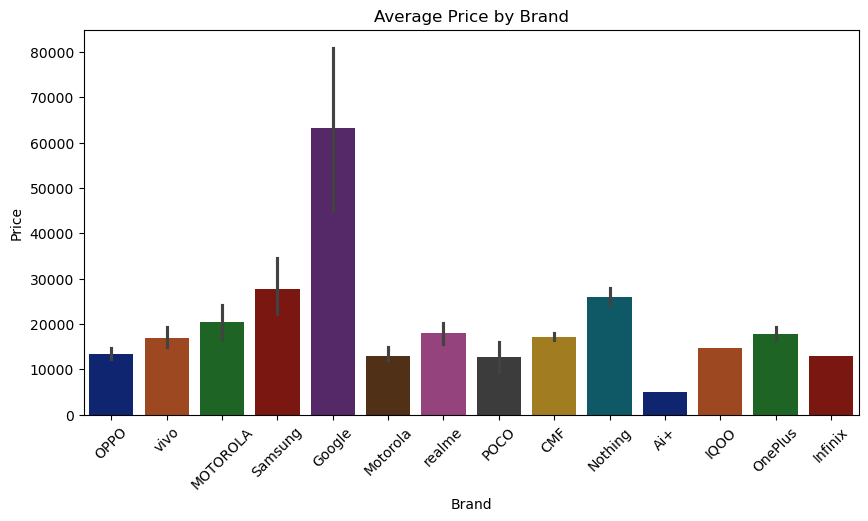

In [388]:
plt.figure(figsize=(10,5))
sns.barplot(x='Brand', y='Price', data=final_df, estimator='mean', palette='dark')
plt.title("Average Price by Brand")
plt.xticks(rotation=45)
plt.show()

## countplot

C:\Users\Suddala Vaishnavi\AppData\Local\Temp\ipykernel_22240\3277279826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Brand', data=final_df, palette='mako')


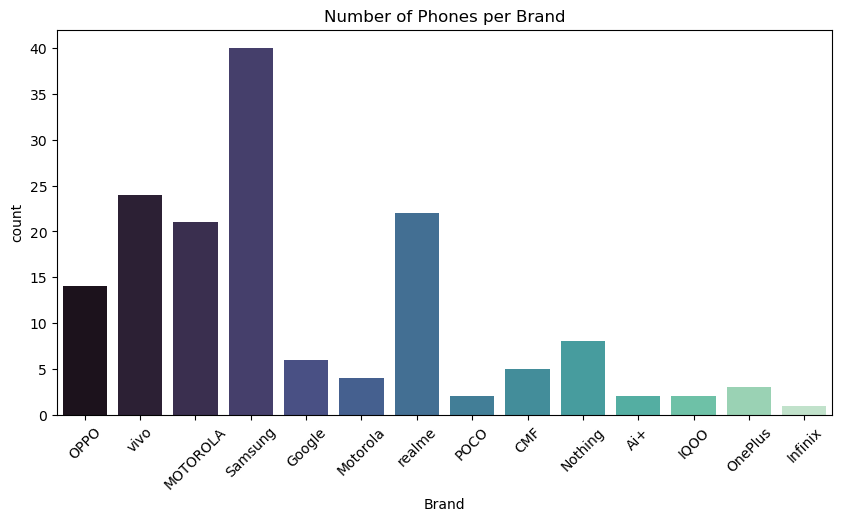

In [389]:
plt.figure(figsize=(10,5))
sns.countplot(x='Brand', data=final_df, palette='mako')
plt.title("Number of Phones per Brand")
plt.xticks(rotation=45)
plt.show()

## Histplot

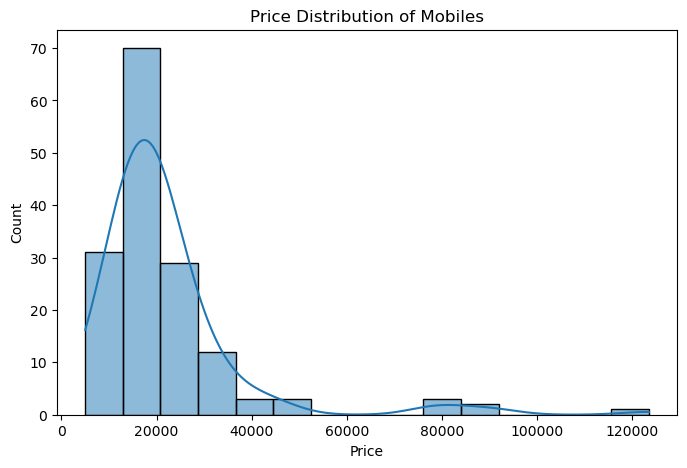

In [390]:
plt.figure(figsize=(8,5))
sns.histplot(final_df['Price'], kde=True, bins=15)
plt.title("Price Distribution of Mobiles")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

## Boxplot

C:\Users\Suddala Vaishnavi\AppData\Local\Temp\ipykernel_22240\3415652478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Price', data=final_df, palette='pastel')


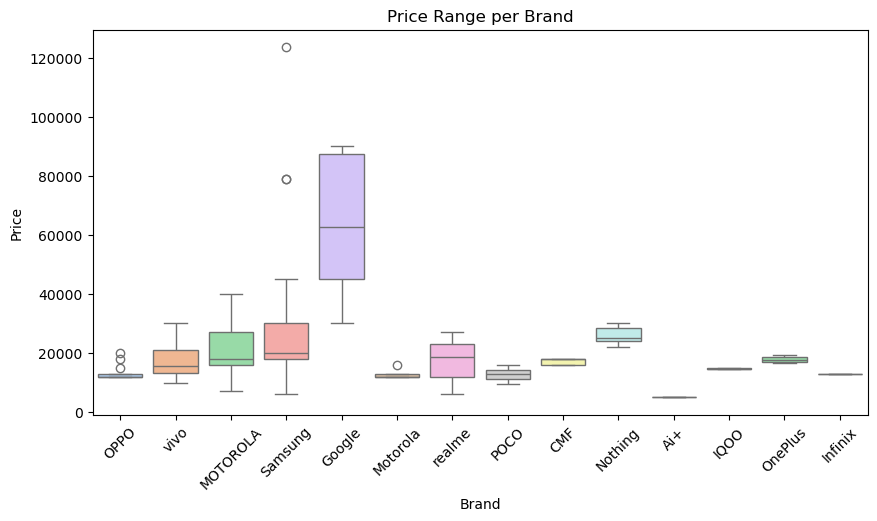

In [391]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Brand', y='Price', data=final_df, palette='pastel')
plt.title("Price Range per Brand")
plt.xticks(rotation=45)
plt.show()

## Scatterplot

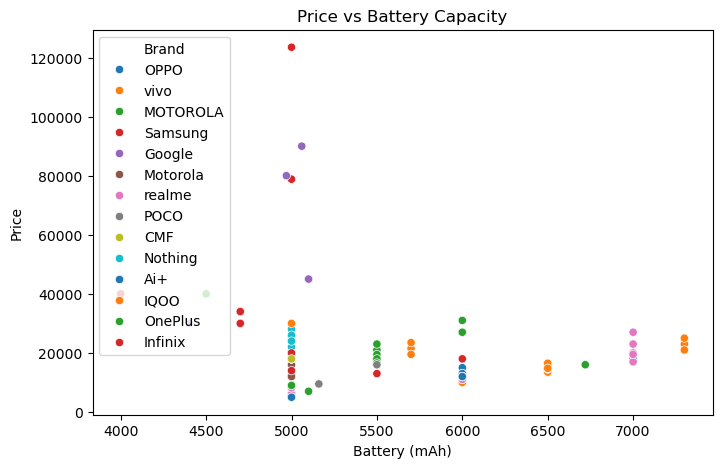

In [392]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Battery', y='Price', hue='Brand', data=final_df, palette='tab10')
plt.title("Price vs Battery Capacity")
plt.xlabel("Battery (mAh)")
plt.ylabel("Price")
plt.show()

## Pie Chart

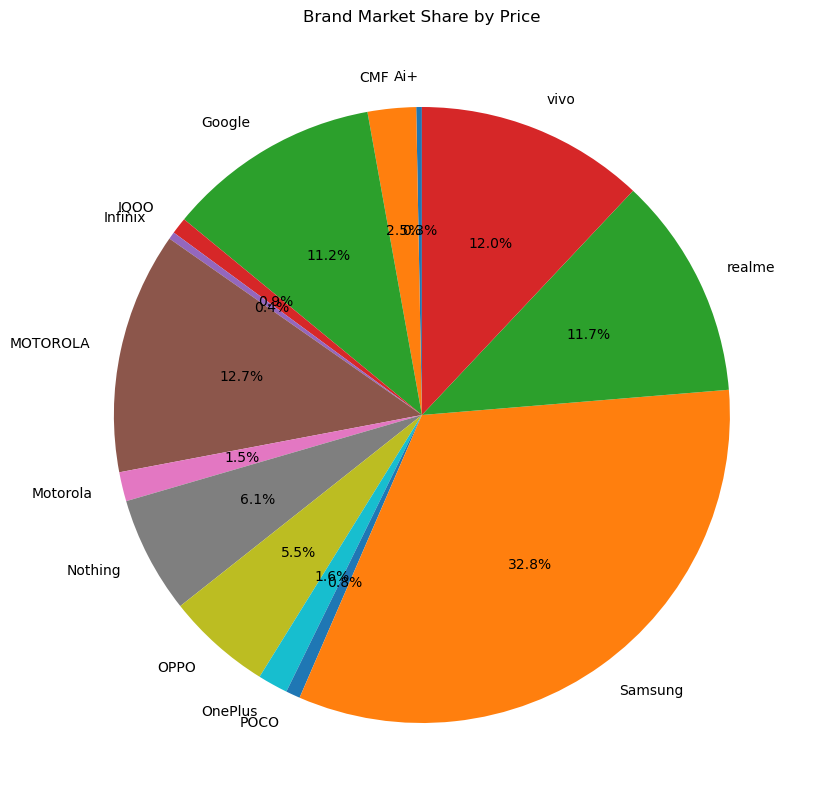

In [399]:
brand_price = final_df.groupby('Brand')['Price'].sum()
plt.figure(figsize=(110,10))
plt.pie(brand_price, labels=brand_price.index, autopct='%1.1f%%', startangle=90)
plt.title("Brand Market Share by Price")
plt.show()